In [76]:
import drawsvg as draw
import math
import random

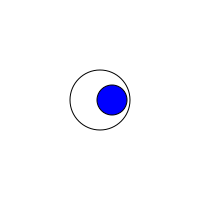

In [31]:
# Eye class
class Eye:
    def __init__(self, x, y, rad, color = 'blue'):
        # eye position and size
        self.x = x
        self.y = y
        self.rad = rad

        # eye gaze direction
        self.direction = 0 # not passed in (radians)

        # eye color
        self.color = color
    
    def lookat(self, lx, ly):
        self.direction = math.atan2(ly-self.y, lx-self.x) # move eye to look at (lx,ly) [SEE slides for geometry]

    def draw(self):
        # draw outer circle
        D.append(draw.Circle(self.x, self.y, self.rad, fill='white', stroke='black'))
        
        # draw inner circle
        ix = 0.4 * self.rad * math.cos(self.direction) + self.x
        iy = 0.4 * self.rad * math.sin(self.direction) + self.y     
        D.append(draw.Circle(ix, iy, 0.5*self.rad, fill=self.color, stroke='black'))

D = draw.Drawing(200, 200, origin='center') # define drawing canvas
e = Eye(0,0,30)
e.draw()
D

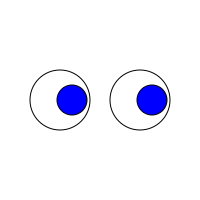

In [32]:
# two eyes
D = draw.Drawing(200, 200, origin='center') # define drawing canvas
el = Eye(-40,0,30)
el.draw()
er = Eye(40,0,30)
er.draw()
D

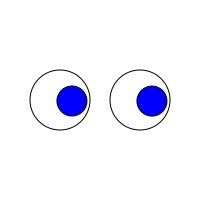

In [44]:
# two eyes moving
def draw_frame():
    el.draw()
    er.draw()
    return D  

el = Eye(-40,0,30)
er = Eye(40,0,30)

for th in range(0,360,5):
    D = draw.Drawing(200, 200, origin='center') # erase canvas
    thr = math.radians(th); # convert from degrees to radians
    el.lookat(1000*math.cos(thr), -1000*math.sin(thr) )
    er.lookat(1000*math.cos(thr), -1000*math.sin(thr) )
    with draw.frame_animate_jupyter(draw_frame, delay=0.05) as anim:
        anim.draw_frame()

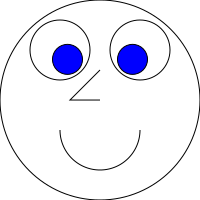

In [74]:
# face with two eyes
class Face:
    def __init__(self, x, y, size):
        # face position and size
        self.x = x
        self.y = y
        self.size = size
        
        # create eyes
        self.lefteye = Eye( x+40, y-50, 30 )
        self.righteye = Eye( x-40, y-50, 30 )
        
    def lookat(self, lx, ly):
        self.lefteye.lookat( lx, ly )
        self.righteye.lookat( lx, ly )
       
    def draw(self):
        # draw face
        D.append(draw.Circle(self.x, self.y, self.size, fill='white', stroke='black'))

        # draw eyes
        self.lefteye.draw()
        self.righteye.draw()
        
        # draw nose
        p = draw.Path(stroke='black', fill='white')
        p.M(self.x+0,self.y-30)   # Start path 
        p.l(-30,30) # Draw line to next point
        p.l(30,0)  # Draw line to next point
        D.append(p)

        # draw mouth
        D.append(draw.Arc(self.x+0,self.y+30,40,180,0, stroke='black', fill='white'))
      
D = draw.Drawing(200, 200, origin='center') # define drawing canvas
F = Face(0,0,100)
F.lookat(0,0)
F.draw()
D


In [85]:
# --- DRILL ---
# Write a "Crowd" class
# 
# The constructor should take as input a number N
# and create a list of N faces
# 
# The member function "lookat" should have each face
# look at a random location
# 
# The member function draw should draw all of the faces
# 
# Make canvas 800x800, N = 25, face size 100 

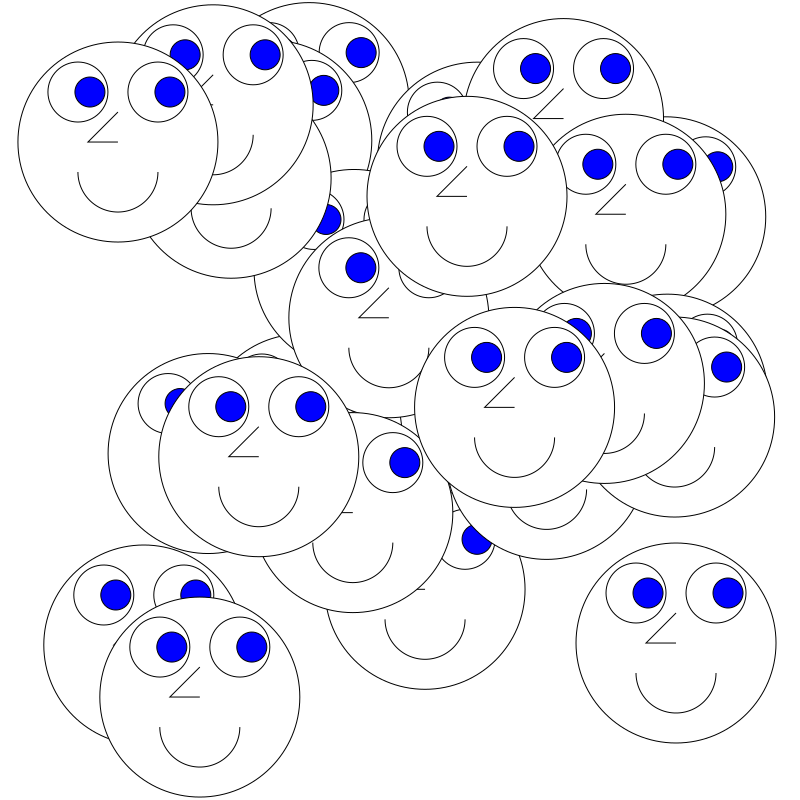

In [144]:
class Crowd:
    def __init__(self, n):
        # list of N faces
        self.faces = []
        for i in range(0, n):
            self.face = Face(random.uniform(-300, 300), random.uniform(-300, 300), 100)
            self.faces.append(self.face)

    def __str__(self):
        return "Number of faces: " + str(len(self.faces))
    
    def lookat(self):
        for i in range(0, len(self.faces)):
            self.faces[i].lookat(random.uniform(-5000, 5000), random.uniform(-5000, 5000))
            
    # Draw crowd
    def draw(self):
        for i in range(0, len(self.faces)):
            self.faces[i].draw()


D = draw.Drawing(800, 800, origin='center') # define drawing canvas 
people = Crowd(25)
people.draw()
D
